In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/south-african-language-identification-hack-2023/sample_submission.csv
/kaggle/input/south-african-language-identification-hack-2023/test_set.csv
/kaggle/input/south-african-language-identification-hack-2023/train_set.csv


# ****ExploreAI Academy Classification Hackathon****

# ****Overview****


South Africa is a multicultural society that is characterised by its rich linguistic diversity. Language is an indispensable tool that can be used to deepen democracy and also contribute to the social, cultural, intellectual, economic and political life of the South African society.

The country is multilingual with 11 official languages, each of which is guaranteed equal status. Most South Africans are multilingual and able to speak at least two or more of the official languages.


From <a href="https://www.gov.za/about-sa/south-africas-people">South African Government<a>
    
<img src="https://www.googleapis.com/download/storage/v1/b/kaggle-user-content/o/inbox%2F2205222%2F7f34544c1b1f61d1a5949bddacfd84a9%2FSouth_Africa_languages_2011.jpg?generation=1604393669339034&alt=media" alt="language"/>

With such a multilingual population, it is only obvious that our systems and devices also communicate in multi-languages.

In this challenge, you will take text which is in any of South Africa's 11 Official languages and identify which language the text is in. This is an example of NLP's Language Identification, the task of determining the natural language that a piece of text is written in.



In [2]:
df_sample = pd.read_csv('/kaggle/input/south-african-language-identification-hack-2023/sample_submission.csv')
df_train = pd.read_csv('/kaggle/input/south-african-language-identification-hack-2023/train_set.csv')
df_test = pd.read_csv('/kaggle/input/south-african-language-identification-hack-2023/test_set.csv')

In [3]:
import sklearn

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.linear_model import Ridge
from sklearn.model_selection import KFold
from sklearn import linear_model
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report,confusion_matrix 
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier

from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import StratifiedKFold, cross_validate, train_test_split, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.metrics import roc_curve, auc, classification_report, confusion_matrix, precision_score, recall_score,  accuracy_score, precision_recall_curve
from sklearn.model_selection import train_test_split

from sklearn.model_selection import StratifiedKFold, cross_validate, train_test_split, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.metrics import roc_curve, auc, classification_report, confusion_matrix, precision_score, recall_score,  accuracy_score, precision_recall_curve


In [4]:
import nltk
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import TweetTokenizer
from nltk.tokenize import word_tokenize 
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import sent_tokenize
from nltk.corpus import stopwords


In [5]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import seaborn as sns
import matplotlib.pyplot as plt

import scipy

import warnings
warnings.filterwarnings('ignore')

import re
from collections import Counter

In [6]:
df_sample.head()

,index,lang_id
0,1,tsn
1,2,nbl


In [7]:
df_train.head()

,lang_id,text
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko ax...
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi na...
2,eng,the province of kwazulu-natal department of tr...
3,nso,o netefatša gore o ba file dilo ka moka tše le...
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...


In [8]:
df_test.head()

,index,text
0,1,"Mmasepala, fa maemo a a kgethegileng a letlele..."
1,2,Uzakwaziswa ngokufaneleko nakungafuneka eminye...
2,3,Tshivhumbeo tshi fana na ngano dza vhathu.
3,4,Kube inja nelikati betingevakala kutsi titsini...
4,5,Winste op buitelandse valuta.


**getting all Data together.**

In [9]:
df = df_train.append(df_test, sort= False)

In [10]:
df

,lang_id,text,index
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko ax...,NaN
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi na...,NaN
2,eng,the province of kwazulu-natal department of tr...,NaN
3,nso,o netefatša gore o ba file dilo ka moka tše le...,NaN
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...,NaN
...,...,...,...
5677,NaN,You mark your ballot in private.,5678.0
5678,NaN,Ge o ka kgetha ka bowena go se šomiše Mofani k...,5679.0
5679,NaN,"E Ka kopo etsa kgetho ya hao ka hloko, hobane ...",5680.0
5680,NaN,"TB ke bokudi ba PMB, mme Morero o tla lefella ...",5681.0


In [11]:
df.describe()

,index
count,5682.000000
mean,2841.500000
std,1640.396446
min,1.000000
25%,1421.250000
50%,2841.500000
75%,4261.750000
max,5682.000000


In [12]:
duplicatedRow = df[df.duplicated()]
print(duplicatedRow[:5])

     lang_id                                               text  index
940      xho  xa umntu lowo ephuma kule ndawo yihlola-hlolen...    NaN
1208     nbl  ngokwesekhtjheni yomthetho ophathelene nalokhu...    NaN
1252     ssw  kwabelana ngemininingwane enhlanganweni kutakw...    NaN
1304     xho  umntu ocela ukukhuselwa ngumbuso ngumntu obale...    NaN
1460     ven  kha vha ḓivhe hezwi a vha nga ḓo ita ndingo ya...    NaN


In [13]:
df.shape

(38682, 3)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38682 entries, 0 to 5681
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   lang_id  33000 non-null  object 
 1   text     38682 non-null  object 
 2   index    5682 non-null   float64
dtypes: float64(1), object(2)
memory usage: 1.2+ MB


In [15]:
display(df_train.isnull().sum().sort_values(ascending=False))

lang_id    0
text       0
dtype: int64

In [16]:
df['CleanText'] = df['text'].copy()
display(df.head(5))

,lang_id,text,index,CleanText
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko ax...,NaN,umgaqo-siseko wenza amalungiselelo kumaziko ax...
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi na...,NaN,i-dha iya kuba nobulumko bokubeka umsebenzi na...
2,eng,the province of kwazulu-natal department of tr...,NaN,the province of kwazulu-natal department of tr...
3,nso,o netefatša gore o ba file dilo ka moka tše le...,NaN,o netefatša gore o ba file dilo ka moka tše le...
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...,NaN,khomishini ya ndinganyiso ya mbeu yo ewa maana...


# **Text Cleaining**

In [17]:
def before_lowercase(languages):
    
    languages = re.sub(r" xho", " Isixhosa", languages)
    languages = re.sub(r" nbl", " Ndebele", languages)
    languages = re.sub(r" ssw", " Swati", languages)
    languages = re.sub(r" ven", " Venda", languages)
    languages = re.sub(r" sot", " Sotho", languages)
    languages = re.sub(r" eng", " English", languages)
    languages = re.sub(r" tsn", " Tsonga", languages)
    languages = re.sub(r" nso", " Northern Sotho", languages)
    languages = re.sub(r" zul", " IsiZulu", languages)
    languages = re.sub(r" afr", " Afrikaans", languages)
    languages = re.sub(r" tws", " Tswana", languages)
    return str(languages)

In [18]:
df['CleanText'] = df['CleanText'].apply(before_lowercase)
display(df['CleanText'].head(10))

0    umgaqo-siseko wenza amalungiselelo kumaziko ax...
1    i-dha iya kuba nobulumko bokubeka umsebenzi na...
2    the province of kwazulu-natal department of tr...
3    o netefatša gore o ba file dilo ka moka tše le...
4    khomishini ya ndinganyiso ya mbeu yo ewa maana...
5    dinyakišišo tše tša go dirwa gabedi ka ngwaga ...
6    kgetse nngwe le nngwe e e sa faposiwang mo tsh...
7    mbadelo dze dza laelwa dzi do kwama mahatulele...
8    maloko a dikhuduthamaga a ikarabela mongwe le ...
9    fa le dirisiwa lebone le tshwanetse go bontsha...
Name: CleanText, dtype: object

# **Remove URL**

In [19]:
def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'link', text)

from bs4 import BeautifulSoup
#Function for removing html
def html(text):
    return BeautifulSoup(text, "lxml").text

In [20]:
df['CleanText'] = df['CleanText'].apply(remove_urls)
df['CleanText'] = df['CleanText'].apply(html)

# **Lowercase**

In [21]:
df['CleanText'] = df['CleanText'].str.lower()
display(df['CleanText'].head(10))

0    umgaqo-siseko wenza amalungiselelo kumaziko ax...
1    i-dha iya kuba nobulumko bokubeka umsebenzi na...
2    the province of kwazulu-natal department of tr...
3    o netefatša gore o ba file dilo ka moka tše le...
4    khomishini ya ndinganyiso ya mbeu yo ewa maana...
5    dinyakišišo tše tša go dirwa gabedi ka ngwaga ...
6    kgetse nngwe le nngwe e e sa faposiwang mo tsh...
7    mbadelo dze dza laelwa dzi do kwama mahatulele...
8    maloko a dikhuduthamaga a ikarabela mongwe le ...
9    fa le dirisiwa lebone le tshwanetse go bontsha...
Name: CleanText, dtype: object

In [22]:
char_list = ["don", "ain", "ain't", "aren", "arent", "aren't", "cannot", "cant", "can't", "couldn", "couldnt", "couldn't", "didn",
               "didn't", "doesn", "doesn't", "don", "don't", "hadn", "hadn't", "hasn", "hasnt", "hasn't", "haven", "haven't", "mightn", "mightn't",
               "isn", "isn't",  "mustn", "mustn't", "needn", "needn't", "nt", "shouldn", "shouldn't",  "wasn", "wasnt", "wasn't", "don't"]

def before_lowercase(language):
    language =  re.sub(r"|".join(char_list), "not", language) 
    return str(language)

df['CleanText'] = df['CleanText'].apply(before_lowercase)
display(df['CleanText'].head(10))

0    umgaqo-siseko wenza amalungiselelo kumaziko ax...
1    i-dha iya kuba nobulumko bokubeka umsebenzi na...
2    the province of kwazulu-natal departmenot of t...
3    o netefatša gore o ba file dilo ka moka tše le...
4    khomishini ya ndinganyiso ya mbeu yo ewa maana...
5    dinyakišišo tše tša go dirwa gabedi ka ngwaga ...
6    kgetse nngwe le nngwe e e sa faposiwang mo tsh...
7    mbadelo dze dza laelwa dzi do kwama mahatulele...
8    maloko a dikhuduthamaga a ikarabela mongwe le ...
9    fa le dirisiwa lebone le tshwanetse go bonotsh...
Name: CleanText, dtype: object

**Stopwords**

In [23]:
stopwords_List = ["0o", "0s", "3a", "3b", "3d", "6b", "6o", "a", "a1", "a2", "a3", "a4", "ab", "able", "about", "above", "abst", "ac", "accordance", "according", "accordingly", 
                     "across", "act", "actually", "ad", "added", "adj", "ae", "af", "after", "afterwards", "ag", "again", "ah", "aj", "al", "all",
                      "also", "although", "always", "am", "among", "amongst", "amoungst",  "an", "and", "announce", 
                      "ao", "ap", "apparently", "appear",  "appropriate", "to",
                     "approximately", "ar", "are",  "arise", "around", "as", "a's", "aside",  "associated", "at", "au", "auth", "av",  "aw", "away", "ax", "ay", 
                     "az", "b", "b1", "b2", "b3", "ba", "back", "bc", "bd", "be", "became", "because", "become", "becomes", "becoming", "been", "before", "beforehand", "begin", "beginning",
                     "beginnings", "begins", "behind", "being",  "below", "beside", "besides", "between", "beyond", "bi", "bill", "biol", "bj", "bk", "bl", "bn", "both", "bottom", 
                     "bp", "br", "brief", "briefly", "bs", "bt", "bu", "but", "bx", "by", "c", "c1", "c2", "c3", "ca", "call", "came",  "cc", "cd", "ce", 
                      "cf", "cg", "ch", "ci", "cit", "cj", "cl", "cm", "c'mon", "cn", "co", "com", "come", "comes", "con", "concerning", "consequently",
                     "consider", "considering", "contain", "containing", "contains", "corresponding", "could", "course", "cp", "cq", "cr", "cry", "cs", "c's", "ct", "cu", "currently",
                     "cv", "cx", "cy", "cz", "d", "d2", "da", "date", "dc", "dd", "de", "definitely", "describe", "described", "despite", "detail", "df", "di", "did",  "different", "dj",
                     "dk", "dl", "do", "does", "doing", "downwards", "dp", "dr", "ds", "dt", "du", "due", "during", "dx", "dy", "e", "e2", "e3", "ea", "each", "ec", "ed", 
                     "edu", "ee", "ef", "effect", "eg", "ei", "eight", "eighty", "either", "ej", "el", "eleven", "else", "elsewhere", "em", "en", "end", "ending", "entirely", "eo", "ep", "eq",
                     "er", "es", "especially", "est", "et", "et-al", "etc", "eu", "ev", "every", "everybody", "everyone", "everything", "everywhere", "ex", "exactly", "example", "ey", "f", "f2",
                     "fa", "far", "fc", "few", "ff", "fi", "fifteen", "fifth", "fify", "fill", "find", "fire", "first", "five", "fix", "fj", "fl", "fn", "fo", "followed", "following", "follows",
                     "for", "former", "formerly", "forth", "forty", "found", "four", "fr", "from", "front", "fs", "ft", "fu", "full", "further", "furthermore", "fy", "g", "ga", "gave", "ge", 
                     "get", "gets", "getting", "gi", "give", "given", "gives", "giving", "gj", "gl", "go", "goes", "going", "gone", "got", "gotten", "gr", "greetings", "gs", "gy", "h", "h2", 
                     "h3", "had", "happens", "hardly", "has",  "have",  "having", "he", "hed", "he'd", "he'll", "hello", "hence", "her", "here", "hereafter", "hereby", "herein", "heres",
                     "here's", "hereupon", "hers", "herself", "hes", "he's", "hh", "hi", "hid", "him", "himself", "his", "hither", "hj", "ho",  "hopefully", "how", "howbeit", "however", 
                     "how's", "hr", "hs", "http", "hu", "hundred", "hy", "i", "i2", "i3", "i4", "i6", "i7", "i8", "ia", "ib", "ibid", "ic", "id", "i'd", "ie", "if", "ig",  "ih", "ii", "ij",
                     "il", "i'll", "im", "i'm", "in", "inasmuch", "inc", "index", "indicate", "indicated", "indicates", "inner", "insofar", "interest", "into", "invention",
                     "inward", "io", "ip", "iq", "ir", "is",  "it", "itd", "it'd", "it'll", "its", "it's", "itself", "iv", "i've", "ix", "iy", "iz", "j", "jj", "jr", "js", "jt", "ju", 
                     "k", "ke", "keep", "keeps", "kept", "kg", "kj", "km", "know", "known", "knows", "ko", "l", "l2", "la", "largely",  "lately", "later", "latter", "latterly", "lb", "lc",
                     "le", "les", "lest", "let", "lets", "let's", "lf", "line", "little", "lj", "ll", "ll", "ln", "lo", "look", "looking", "looks", "los", "lr", "ls", "lt", "ltd",
                     "m", "m2", "ma", "made", "mainly", "make", "makes", "me", "mean", "means", "meantime", "meanwhile", "merely", "mg", "mill", "million", "mine", 
                     "ml", "mn", "mo", "more", "moreover", "move", "mr", "mrs", "ms", "mt", "mu", "mug",  "my", "myself", "n", "n2", "na", "name", "namely", "nay", 
                     "nc", "nd", "ne", "near", "nearly","new", "next", "ng", "ni", "nine", "ninety", "nj", "nl", "nn", "nos", "noted",  "novel", "now", "nr", "ns",  "ny", "o", "oa", "ob", 
                     "obtain", "obtained", "obviously", "oc", "od", "of", "off", "often", "og", "oh", "oi", "oj", "ol", "old", "om", "omitted", "on", "once", "one", "ones",  "onto", 
                     "oo", "op", "oq", "or", "ord", "os", "ot", "other", "others",  "ou", "ought", "our", "ours", "ourselves",  "overall", "ow", "owing", "own", "ox", "oz", "p", "p1", "p2",
                     "p3", "page", "pagecount", "pages", "par", "part", "particular", "particularly", "pas", "past", "pc", "pd", "pe", "per", "pf", "ph", "pi", "pj", "pk", "pl", "placed", 
                      "plus", "pm", "pn", "po", "pp", "pq", "pr", "predominantly", "present", "presumably", "previously",  "promptly", "ps", "pt", "pu", "put", "py", "q", "qj", "qu", "que",
                      "qv", "r", "r2", "ra", "ran", "rather", "rc", "rd", "re", "readily",  "ref", "refs", "regarding",  "related", "relatively", "research-articl", "respectively",
                      "rf", "rh", "ri", "right", "rj", "rl", "rm", "rn", "ro", "rq", "rr", "rs", "rt", "ru", "run", "rv", "ry", "s", "s2", "sa", "said", "same", "saw", "say", "saying", "says",
                     "sc", "sd", "se", "sec", "second", "secondly", "section", "see", "seeing", "seem", "seemed", "seeming", "seems", "seen", "self", "selves", "sensible", "sent", 
                     "seven", "several", "sf", "shall", "shan", "shan't", "she", "shed", "she'd", "she'll", "shes", "she's", "should",  "should've",  "si", "side", "significant",
                     "significantly", "similar", "similarly", "since", "sincere", "six", "sixty", "sj", "sl", "slightly", "sm", "sn", "so", "some", "somebody", "somehow", "someone",
                     "somethan", "something", "sometime", "sometimes", "somewhat", "somewhere", "soon", "sp", "specifically", "specified", "specify", "specifying", "sq", "sr", "ss", "st",
                      "sub", "substantially", "sup", "sy", "system", "sz", "t", "t1", "t2", "t3", "take", "taken", "taking", "tb", "tc", "td", "te", "tell", "ten", "tends", "tf", "th",  "that",
                     "that'll", "thats", "that's", "that've", "the", "their", "theirs", "them", "themselves", "then", "thence", "there", "thereafter", "thereby", "thered", "therefore", "therein",
                     "there'll", "thereof", "therere", "theres", "there's", "thereto", "thereupon", "there've", "these", "they", "theyd", "they'd", "they'll", "theyre", "they're", "they've",
                     "thickv", "thin", "think", "third", "this", "thorough", "thoroughly", "those", "thou", "though", "thoughh", "thousand", "three", "throug", "through", "throughout", "thru", 
                     "thus", "ti", "til", "tip", "tj", "tl", "tm", "tn", "to",  "too", "took", "top", "toward", "towards", "tp", "tq", "tr",  "ts", "t's", "tt", "tv", "twelve", "twenty",
                     "twice", "two", "tx", "u", "u201d", "ue", "ui", "uj", "uk", "um", "un", "under", "unto", "uo", "up", "upon", "ups", "ur", "us", "use", "used",  "uses", "using","ut",
                     "v", "va", "value", "various", "vd", "ve", "ve",  "via", "viz", "vj", "vo", "vol", "vols", "volumtype", "vq", "vs", "vt", "vu", "w", "wa", "want", "wants", "was",  "way", "we", 
                     "wed", "we'd",  "went", "were", "we're",  "we've", "what", "whatever", "what'll", "whats", "what's", "when", "whence", "whenever", "when's", "where", "whereafter",
                     "whereas", "whereby", "wherein", "wheres", "where's", "whereupon", "wherever", "whether", "which", "while", "whim", "whither", "who", "whod", "whoever", "whole", "who'll",
                     "whom", "whomever", "whos", "who's", "whose", "why", "why's", "wi", "widely", "will", "willing", "with", "within",  "wo",  "words", "world", "would",  "www", "x", "x1", "x2",
                     "x3", "xf", "xi", "xj", "xk", "xl", "xn", "xo", "xs", "xt", "xv", "xx", "y", "y2", "yes", "yet", "yj", "yl", "you", "youd", "you'd", "you'll", "your", "youre", "you're", "yours",
                     "yourself", "yourselves", "you've", "yr", "ys", "yt", "z", "zero", "zi", "zz",',', '.', '"', ':', ')', '(', '!', '?', '|', ';', "'", '$', '&','/', '[', ']', '>', '%', '=', '#', '*', '+', 
                '\\', '•',  '~', '@', '£', '·', '_', '{', '}', '©', '^', '®', '`',  '<', '→', '°', '€', '™', '›', '♥', '←', '×', '§', '″', '′', 'Â', '█', '½', 'à', '…', '“', '★', '”', '–', '●', 'â', '►', '−',  
                'è', '¸', '¾', 'Ã', '⋅', '‘', '∞', '∙', '）', '↓', '、', '│', '（', '»', 
                '¹', '≤', '‡', '√', '«', '»', '´', 'º', '¾', '¡', '§', '£', '₤']
# for adding multiple words
print(len(stopwords_List))

1041


In [24]:
def remove_swords(text,s_list):
    words=[]
    for i in text.split():
        if i not in stopwords_List:
            words.append(i)
    return words

In [25]:
wrd=[]
for texts in df['CleanText']:
    
    wrd.append(remove_swords(texts ,stopwords_List))

In [26]:
df['CleanTexts'] = wrd
df['CleanTexts'].head()

0    [umgaqo-siseko, wenza, amalungiselelo, kumazik...
1    [i-dha, iya, kuba, nobulumko, bokubeka, umsebe...
2    [province, kwazulu-natal, departmenot, transpo...
3    [netefatša, gore, file, dilo, ka, moka, tše, d...
4    [khomishini, ya, ndinganyiso, ya, mbeu, yo, ew...
Name: CleanTexts, dtype: object

In [27]:
def combine_text(input):
    combined = ' '.join(input)
    return combined
df['CleanText'] = df['CleanTexts'].apply(combine_text)
df['CleanText']

0       umgaqo-siseko wenza amalungiselelo kumaziko ax...
1       i-dha iya kuba nobulumko bokubeka umsebenzi na...
2       province kwazulu-natal departmenot transport i...
3       netefatša gore file dilo ka moka tše dumelelan...
4       khomishini ya ndinganyiso ya mbeu yo ewa maana...
                              ...                        
5677                                 mark ballot private.
5678    ka kgetha ka bowena šomiše mofani ka tirelo yo...
5679    ka kopo etsa kgetho ya hao ka hloko, hobane ha...
5680    bokudi pmb, mme morero tla lefella tlhahlobo y...
5681                vakatjhela iwebhusayidi yethu ku-www.
Name: CleanText, Length: 38682, dtype: object

**Remove Special Characters**

In [28]:
def clean(language): 
            
    # Special characters
    language = re.sub(r"\x89Û_", "", language)
    language = re.sub(r"\x89ÛÒ", "", language)
    language = re.sub(r"\x89ÛÓ", "", language)
    language = re.sub(r"\x89ÛÏWhen", "When", language)
    language = re.sub(r"\x89ÛÏ", "", language)
    language = re.sub(r"China\x89Ûªs", "China's", language)
    language = re.sub(r"let\x89Ûªs", "let's", language)
    language = re.sub(r"\x89Û÷", "", language)
    language = re.sub(r"\x89Ûª", "", language)
    language = re.sub(r"\x89Û\x9d", "", language)
    language = re.sub(r"å_", "", language)
    language = re.sub(r"\x89Û¢", "", language)
    language = re.sub(r"\x89Û¢åÊ", "", language)
    language = re.sub(r"fromåÊwounds", "from wounds", language)
    language = re.sub(r"åÊ", "", language)
    language = re.sub(r"åÈ", "", language)
    language = re.sub(r"Ì©", "e", language)
    language = re.sub(r"å¨", "", language)
    language = re.sub(r"åÇ", "", language)
    language = re.sub(r"åÀ", "", language)
    language = re.sub(r'\b[\w\-.]+?@\w+?\.\w{2,4}\b', 'mentioned', language)
    language = re.sub(r'(http[s]?\S+)|(\w+\.[A-Za-z]{2,4}\S*)', 'referance', language)
    language = re.sub(r'£|\$', 'money', language)
    language = re.sub(r'\b(\+\d{1,2}\s)?\d?[\-(.]?\d{3}\)?[\s.-]?\d{3}[\s.-]?\d{4}\b', ' ', language)
    language = re.sub(r'\d+(\.\d+)?', ' ', language)
    language = re.sub(r'[^\w\d\s]', ' ', language)
    language = re.sub(r'\s+', ' ', language)
    language = re.sub(r'^\s+|\s+?$', '', language.lower())
    # Urls
    language = re.sub(r"https?:\/\/t.co\/[A-Za-z0-9]+", "", language)
        
    # Words with punctuations and special characters
    punctuations = '@#!?+&*[]-%.:/();$=><|{}^' + "'`"
    for p in punctuations:
        language = language.replace(p, f' {p} ')
        
    # ... and ..
    language = language.replace('...', ' ... ')
    if '...' not in language:
        language = language.replace('..', ' ... ') 
        
    
        
        
    return str(language)
    

In [29]:
df['CleanText'] = df['CleanText'].apply(clean)
display(df['CleanText'].head(15))

0     umgaqo siseko wenza amalungiselelo kumaziko ax...
1     i dha iya kuba nobulumko bokubeka umsebenzi na...
2     province kwazulu natal departmenot transport i...
3     netefatša gore file dilo ka moka tše dumelelan...
4     khomishini ya ndinganyiso ya mbeu yo ewa maana...
5     dinyakišišo tše tša dirwa gabedi ka ngwaga tla...
6     kgetse nngwe nngwe faposiwang tshekong ya ka t...
7     mbadelo dze dza laelwa dzi kwama mahatulele ap...
8     maloko dikhuduthamaga ikarabela mongwe mongwe ...
9     dirisiwa lebone tshwanetse bonotsha lesedi ben...
10    lapho inarha yangeqadi ingenwe ngokungasimthet...
11    yo dovha hafhu ya khwaṱhisedza uri vhe muya wa...
12    i tip offs anonymous wusizo locingo oluzimele ...
13    tekulima lokufaka ekhatsi yonkhe imisebenoti y...
14    noma yiliphi ilungu lombutho wezokuvikela elin...
Name: CleanText, dtype: object

****Remove Punctuations****

In [30]:
import string
regular_punct = list(string.punctuation)
#all_punct = list(set(regular_punct+ my_stopwords ))
def remove_punctuation(text,punct_list):
    for punc in punct_list:
        if punc in text:
            text = text.replace(punc, ' ')
    return text.strip()
text =" this is my first hackathon.."
remove_punctuation(text ,regular_punct)

'this is my first hackathon'

# **Explore the Data**

In [31]:
df.groupby('lang_id').describe(include=['O']).T

lang_id                                                          afr  \
text       count                                                3000   
           unique                                               2641   
           top     wanvoeding is n ernstige probleem in suid-afri...   
           freq                                                    5   
CleanText  count                                                3000   
           unique                                               2635   
           top     dit waarskynlik meer van toepassing groot onde...   
           freq                                                    5   
CleanTexts count                                                3000   
           unique                                               2636   
           top     [wanvoeding, ernstige, probleem, suid-afrika, ...   
           freq                                                    5   

lang_id                                                          eng  \
text       count                                                3000   
           unique                                               2998   
           top     provincial revenue includes budgeted equitable...   
           freq                                                    2   
CleanText  count                                                3000   
           unique                                               2993   
           top                                    amendmenot amended   
           freq                                                    3   
CleanTexts count                                                3000   
           unique                                               2993   
           top                                 [amendmenot, amended]   
           freq                                                    3   

lang_id                                                          nbl  \
text       count                                                3000   
           unique                                               2362   
           top     ngokwesekhtjheni yomthetho ophathelene nalokhu...   
           freq                                                   17   
CleanText  count                                                3000   
           unique                                               2356   
           top     ngokwesekhtjheni yomthetho ophathelene nalokhu...   
           freq                                                   17   
CleanTexts count                                                3000   
           unique                                               2357   
           top     [ngokwesekhtjheni, yomthetho, ophathelene, nal...   
           freq                                                   17   

lang_id                                                          nso  \
text       count                                                3000   
           unique                                               2873   
           top     bolwetši bo phatlalala ka phetelo ya lerothiny...   
           freq                                                    4   
CleanText  count                                                3000   
           unique                                               2869   
           top     sebopego phethagetšego sengwalwana botelele bj...   
           freq                                                    4   
CleanTexts count                                                3000   
           unique                                               2869   
           top     [sebopego, phethagetšego, sengwalwana, botelel...   
           freq                                                    4   

lang_id                                                          sot  \
text       count                                                3000   
           unique                                               2833   
           top     tip-offs anonymou

In [32]:
temp = df.groupby('lang_id').count()['CleanText'].reset_index().sort_values(by='CleanText',ascending=False)
temp.style.background_gradient(cmap='Purples')

,lang_id,CleanText
0,afr,3000
1,eng,3000
2,nbl,3000
3,nso,3000
4,sot,3000
5,ssw,3000
6,tsn,3000
7,tso,3000
8,ven,3000
9,xho,3000


<Axes: xlabel='lang_id', ylabel='count'>

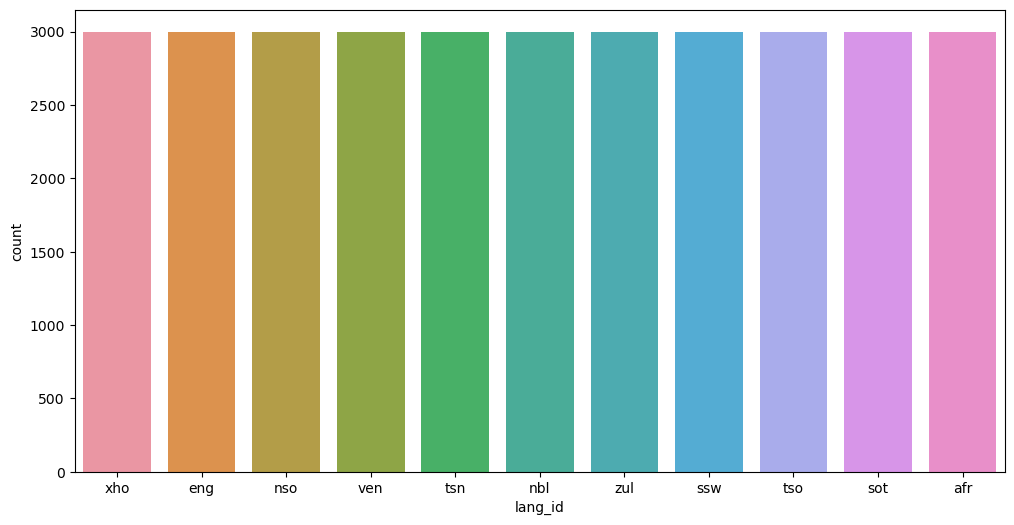

In [33]:
plt.figure(figsize=(12,6))
sns.countplot(x='lang_id',data=df)

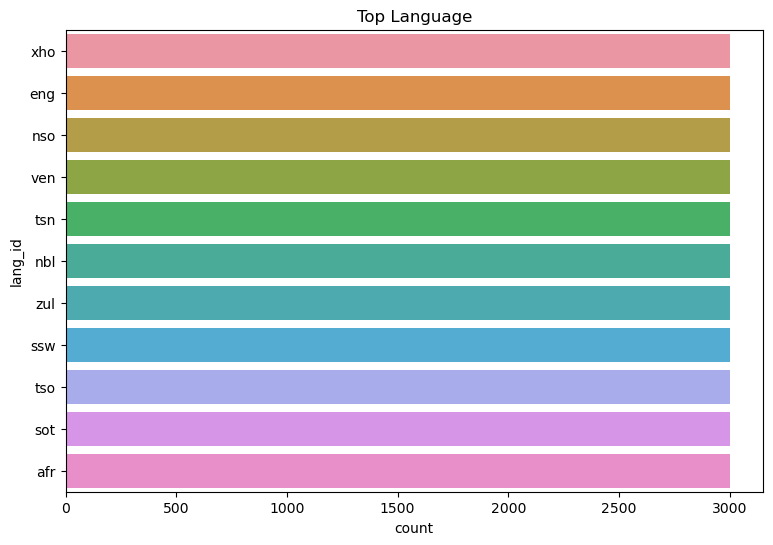

In [34]:
plt.figure(figsize=(9,6))
sns.countplot(y=df.lang_id, order = df.lang_id.value_counts().iloc[:25].index)
plt.title('Top Language')
plt.show()

,lang_id,text,index,CleanText,CleanTexts
28963,ven,muthu muṅwe na muṅwe we a itwa muaro wa u shan...,NaN,muthu muṅwe muṅwe itwa muaro shandukisa mbeu k...,"[muthu, muṅwe, muṅwe, itwa, muaro, shandukisa,..."
29270,nbl,zitlolise emnyangweni wezabasebenzi njengomunt...,NaN,zitlolise emnyangweni wezabasebenzi njengomuno...,"[zitlolise, emnyangweni, wezabasebenzi, njengo..."



Languags
------------------------------------------------------------------------


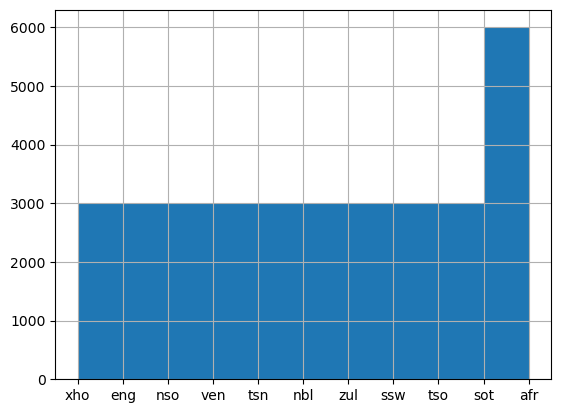

In [35]:
display(df.sample(2))

print ( '\nLanguags\n------------------------------------------------------------------------')
df['lang_id'].hist() ;

In [36]:
from collections import Counter
cnt = Counter()
for text in df["CleanText"].values:
    for word in text.split():
        cnt[word] += 1
        
cnt.most_common(10)

[('ya', 32636),
 ('ka', 20967),
 ('die', 11345),
 ('ku', 9843),
 ('nga', 7910),
 ('ha', 5412),
 ('tsa', 5384),
 ('van', 5383),
 ('vha', 5038),
 ('tse', 4021)]

In [37]:
def get_n_words(corpus, direction, n):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    if direction == "top":
        words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    else:
        words_freq =sorted(words_freq, key = lambda x: x[1], reverse=False)
    return words_freq[:n]

In [38]:
from sklearn.feature_extraction.text import CountVectorizer
common_words = get_n_words(df['CleanText'], "top", 15)
rare_words = get_n_words(df['CleanText'], "bottom", 15)

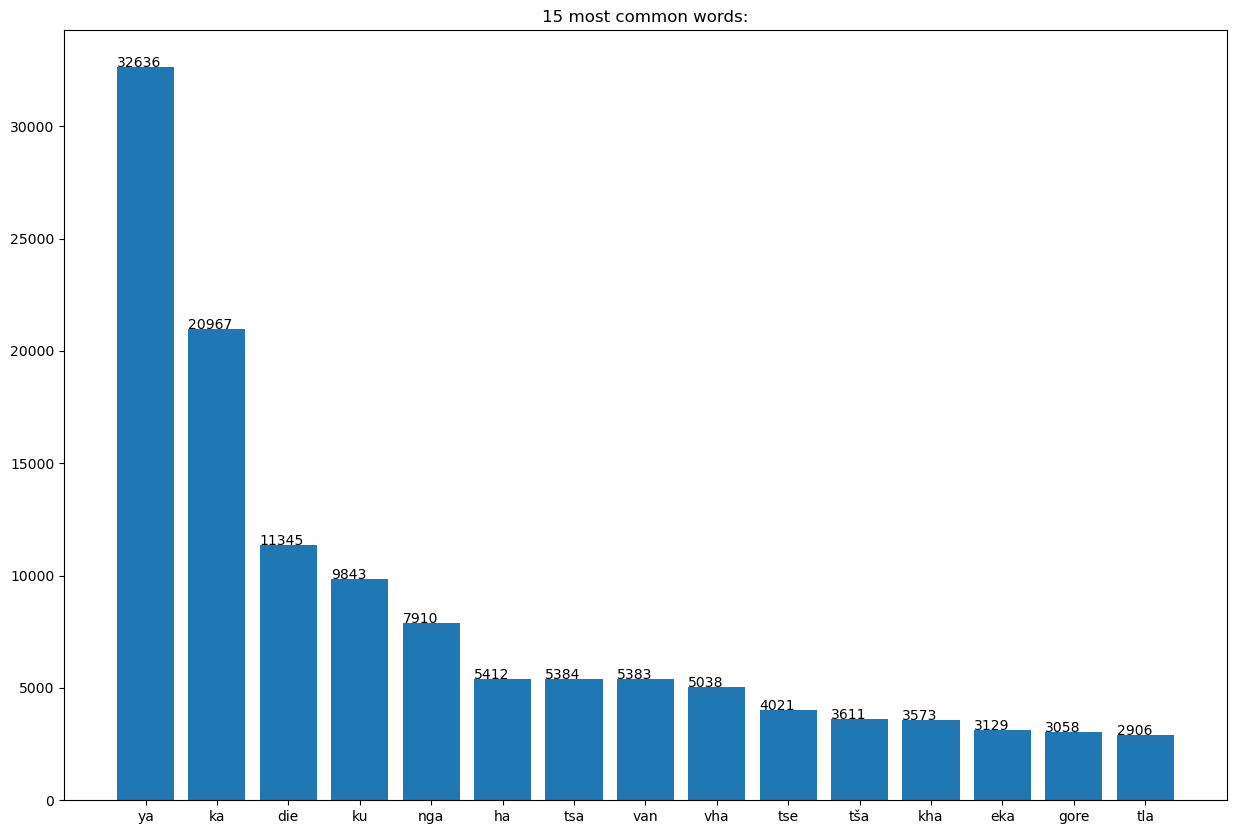

In [39]:
common_words = dict(common_words)
names = list(common_words.keys())
values = list(common_words.values())
plt.subplots(figsize = (15,10))
bars = plt.bar(range(len(common_words)),values,tick_label=names)
plt.title('15 most common words:')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval + .01, yval)
plt.show()

**Tokenize**

In [40]:
df['CleanText'] = df['CleanText'].apply(word_tokenize)
display(df['CleanText'].head(5))

0    [umgaqo, siseko, wenza, amalungiselelo, kumazi...
1    [i, dha, iya, kuba, nobulumko, bokubeka, umseb...
2    [province, kwazulu, natal, departmenot, transp...
3    [netefatša, gore, file, dilo, ka, moka, tše, d...
4    [khomishini, ya, ndinganyiso, ya, mbeu, yo, ew...
Name: CleanText, dtype: object

**Lemmatizer**

In [41]:
lem = WordNetLemmatizer()
def lemma_wordnet(input):
    return [lem.lemmatize(i) for i in input]
 

In [42]:
display(df['CleanText'].head(5))

0    [umgaqo, siseko, wenza, amalungiselelo, kumazi...
1    [i, dha, iya, kuba, nobulumko, bokubeka, umseb...
2    [province, kwazulu, natal, departmenot, transp...
3    [netefatša, gore, file, dilo, ka, moka, tše, d...
4    [khomishini, ya, ndinganyiso, ya, mbeu, yo, ew...
Name: CleanText, dtype: object

In [43]:
def combine_text(input):
    combined = ' '.join(input)
    return combined
df['CleanText'] = df['CleanText'].apply(combine_text)
df['CleanText']

0       umgaqo siseko wenza amalungiselelo kumaziko ax...
1       i dha iya kuba nobulumko bokubeka umsebenzi na...
2       province kwazulu natal departmenot transport i...
3       netefatša gore file dilo ka moka tše dumelelan...
4       khomishini ya ndinganyiso ya mbeu yo ewa maana...
                              ...                        
5677                                  mark ballot private
5678    ka kgetha ka bowena šomiše mofani ka tirelo yo...
5679    ka kopo etsa kgetho ya hao ka hloko hobane ha ...
5680    bokudi pmb mme morero tla lefella tlhahlobo ya...
5681                 vakatjhela iwebhusayidi yethu ku www
Name: CleanText, Length: 38682, dtype: object

In [44]:
import re

# Text cleaning function
def clean_text(text):
    # Remove non-alphabetic characters
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Convert to lowercase
    text = text.lower()
    return text

# Apply text cleaning to the training and test data
df_train['text'] = df_train['text'].apply(clean_text)
df_test['text'] = df_test['text'].apply(clean_text)


In [45]:
train_texts = df_train['text']
train_labels = df_train['lang_id']
test_texts = df_test['text']

In [46]:
vectorizer = CountVectorizer()

In [47]:
train_features = vectorizer.fit_transform(train_texts)

In [48]:
# Transform the test data
test_features = vectorizer.transform(test_texts)

In [49]:
# Split the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(train_features, train_labels, test_size=0.2, random_state=42)

In [50]:
from sklearn.svm import LinearSVC

classifier = LinearSVC()
classifier.fit(X_train, y_train)

LinearSVC()

In [51]:
# Predict the labels for the validation set
val_predictions = classifier.predict(X_val)

In [52]:
from sklearn.metrics import f1_score
f1 = f1_score(y_val, val_predictions, average='weighted')

In [53]:
print("F1 Score:", f1)

F1 Score: 0.9959112429631596


In [54]:
X_test = df_test['text']
X_test_vectorized = vectorizer.transform(X_test)

In [55]:
# Predict on the test set
y_test_pred = classifier.predict(X_test_vectorized)

In [56]:
submission_df = pd.DataFrame({'index': df_test.index, 'lang_id': y_test_pred})
submission_df.to_csv('submission.csv', index=False)

In [57]:
submission_df

,index,lang_id
0,0,tsn
1,1,nbl
2,2,ven
3,3,ssw
4,4,ssw
...,...,...
5677,5677,xho
5678,5678,nso
5679,5679,sot
5680,5680,sot
